In [1]:
import pandas as pd
from shapely.wkt import loads
from shapely.geometry import LineString
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
import math



points = pd.read_pickle("Data/points.pkl")
trajs = pd.read_pickle("Data/trajectories.pkl")

points = points.sort_values(by=["trajectory_sid", "timestamp"])
grouped_points = points.groupby("trajectory_sid")["timestamp"].apply(list).reset_index()

heading_df = pd.merge(trajs, grouped_points, left_index=True, right_on="trajectory_sid", how="left")

road_80_points = [LineString([(322169, 6411344), (322081, 6412907)]), LineString([(322108, 6408320), (322143, 6408455)]), LineString([(323509, 6402118), (323445, 6402093)]), LineString([(321349, 6397697), (321290, 6397846)]), LineString([(322376, 6396936), (322191, 6397229)])]
road_80_names = ["angered", "agnesberg", "torpamotet", "kallebäck", "riksväg_40"]


In [2]:
points.loc[points.trajectory_sid == 8110058]

,x,y,timestamp,trajectory_sid
9984305,322093.360623,6.407804e+06,2019-08-26 15:29:55+02:00,8110058
9984306,322093.785034,6.407940e+06,2019-08-26 15:30:05+02:00,8110058
9984307,322091.047272,6.408073e+06,2019-08-26 15:30:15+02:00,8110058
9984308,322099.015456,6.408200e+06,2019-08-26 15:30:37+02:00,8110058
9984309,322114.983499,6.408315e+06,2019-08-26 15:30:57+02:00,8110058
9984310,322138.981221,6.408426e+06,2019-08-26 15:31:17+02:00,8110058
9984311,322141.858130,6.408437e+06,2019-08-26 15:31:19+02:00,8110058
9984312,322252.307376,6.409249e+06,2019-08-26 15:34:07+02:00,8110058
9984313,322277.557597,6.409445e+06,2019-08-26 15:35:09+02:00,8110058
9984314,322587.477105,6.409184e+06,2019-08-26 15:36:12+02:00,8110058


In [3]:

# Existing DataFrame (Replace this with your actual DataFrame)

# Your data
data = {
    'x': [324297.602501, 323528.147751, 322957.412698, 322788.845755, 322218.764414, 321552.346206, 321041.207784, 320717.360564, 320322.846098, 319920.230603, 319829.399453, 319692.831235, 319545.056406, 319489.354804, 319505.934586, 319477.068046],
    'y': [6.402411e+06	, 6.402122e+06	, 6.401938e+06	, 6.401930e+06	, 6.401947e+06	, 6.401623e+06	, 6.401063e+06	, 6.400673e+06	, 6.400463e+06	, 6.400302e+06	, 6.400192e+06	, 6.400146e+06	, 6.400118e+06	, 6.400067e+06	, 6.399991e+06, 6.399910e+06],
    'timestamp': ['2019-12-03 02:13:01+01:00', '2019-12-03 02:14:03+01:00', '2019-12-03 02:15:11+01:00', '2019-12-03 02:16:15+01:00', '2019-12-03 02:17:21+01:00', '2019-12-03 02:18:30+01:00', '2019-12-03 02:19:32+01:00', '2019-12-03 02:21:11+01:00', '2019-12-03 02:22:12+01:00', '2019-12-03 02:23:18+01:00', '2019-12-03 02:25:11+01:00', '2019-12-03 02:27:13+01:00', '2019-12-03 02:28:58+01:00', '2019-12-03 02:30:11+01:00', '2019-12-03 02:31:12+01:00', '2019-12-03 02:32:45+01:00'],
    'trajectory_sid': [133742060, 133742060, 133742060, 133742060, 133742060, 133742060, 133742060, 133742060, 133742060, 133742060, 133742060, 133742060, 133742060, 133742060, 133742060, 133742060]
}

# Create a DataFrame from your data
df = pd.DataFrame(data)

# Convert the "timestamp" column to datetime and adjust the time
df['timestamp'] = pd.to_datetime(df['timestamp'])
# df['timestamp'] = df['timestamp'].dt.replace(hour=2, minute=0, second=0)
df

# Concatenate with the existing DataFrame
points = pd.concat([points, df], ignore_index=True)

# print(concatenated_df)


In [4]:
for i in trajs.line.loc[trajs.index == 1952527]:
    print(i)

LINESTRING(324297.60250112804 6402411.053339247,323528.1477511913 6402122.337902588,322957.4126977954 6401938.494550402,322788.8457550599 6401930.382097698,322218.7644138484 6401946.939403183,321552.34620600037 6401622.751468797,321041.20778429863 6401062.879670037,320717.3605641086 6400672.917546953,320322.84609846503 6400463.2032912215,319920.2306030136 6400302.381805046,319829.39945291704 6400192.033202745,319692.8312345807 6400145.703795588,319545.05640617665 6400117.8735116925,319489.3548038632 6400066.763895377,319505.9345862485 6399991.038138885,319477.068045752 6399910.455894117)


In [5]:
new_row = trajs.loc[trajs.index == 1952527].copy()

new_row.index = [133742069]
new_row["start_time"] = pd.Timestamp("2019-12-03 02:13:01+01:00")
new_row["stop_time"] = pd.Timestamp("2019-12-03 02:32:45+01:00")
new_row["speed"] = 66.4



In [6]:
trajs = pd.concat([trajs, new_row])
trajs.index[-1]

133742069

In [7]:
trajs = trajs.drop(trajs.index[-1])

In [8]:
trajs

,start_time,stop_time,duration,data_points,distance,speed,line
2371077,2019-12-01 20:57:10+01:00,2019-12-01 20:57:20+01:00,10,3,15,5.400000,LINESTRING(314767.79803646065 6403136.59248534...
1058771,2019-11-14 16:29:26+01:00,2019-11-14 16:39:34+01:00,608,3,390,2.309211,LINESTRING(319284.49598703685 6400597.24615486...
9740192,2019-07-28 19:17:56+02:00,2019-07-28 19:18:00+02:00,4,2,8,7.200000,"LINESTRING(318385.7626873298 6398497.78847383,..."
1343036,2019-10-15 12:01:40+02:00,2019-10-15 12:02:31+02:00,51,10,268,18.917647,LINESTRING(318322.50756410987 6398287.99863713...
298787,2019-09-04 06:42:10+02:00,2019-09-04 06:42:13+02:00,3,2,4,4.800000,LINESTRING(322172.10875479446 6399075.79506390...
...,...,...,...,...,...,...,...
6403291,2019-07-24 14:29:19+02:00,2019-07-24 14:29:25+02:00,6,2,6,3.600000,LINESTRING(318824.30913446634 6397335.92390821...
9300403,2019-08-30 09:22:01+02:00,2019-08-30 09:22:12+02:00,11,2,16,5.236364,"LINESTRING(318166.66870750417 6399375.1227668,..."
7043913,2019-06-30 09:34:20+02:00,2019-06-30 09:34:25+02:00,5,2,9,6.480000,LINESTRING(325001.77407688537 6403175.21871333...
8901885,2019-07-22 14:52:21+02:00,2019-07-22 14:52:43+02:00,22,3,240,39.272727,LINESTRING(323284.2668565646 6404938.836840234...


In [9]:
print(len(heading_df))
heading_df = heading_df.loc[heading_df.speed < 120]
print(len(heading_df))

2558659
2454685


In [10]:
#
tv_angered = {"location": ["angered", "angered", "angered", "angered", "angered", "angered", "angered", "angered", "angered", "angered", "angered", "angered", "angered", "angered", "angered", "angered", "angered", "angered", "angered", "angered", "angered", "angered", "angered", "angered"],
           "hour": ["2015-11-19 23:00", "2015-11-19 00:00", "2015-11-19 01:00", "2015-11-19 02:00", "2015-11-19 03:00", "2015-11-19 04:00", "2015-11-19 05:00", "2015-11-19 06:00", "2015-11-19 07:00", "2015-11-19 08:00", "2015-11-19 09:00", "2015-11-19 10:00", "2015-11-19 11:00", "2015-11-19 12:00", "2015-11-19 13:00", "2015-11-19 14:00", "2015-11-19 15:00", "2015-11-19 16:00", "2015-11-19 17:00", "2015-11-19 18:00", "2015-11-19 19:00", "2015-11-19 20:00", "2015-11-19 21:00", "2015-11-19 22:00"],
           "mean_speed": [70.6, 74.2, 75.4, 73.2, 69.7, 73.8, 80, 88.2, 89.2, 90.5, 90.6, 87.9, 87.5, 88.2, 88.7, 86.4, 68.7, 60, 80.2, 88.5, 82.3, 75.4, 74.1, 71.1],
           "num_cars": [323, 270, 124, 93, 112, 126, 321, 880, 1430, 1265, 1093, 1177, 1424, 1770, 2049, 2412, 2996, 2893, 2265, 1570, 1152, 704, 543, 542]}

#
tv_agnesberg = {"location": ["agnesberg", "agnesberg", "agnesberg", "agnesberg", "agnesberg", "agnesberg", "agnesberg", "agnesberg", "agnesberg", "agnesberg", "agnesberg", "agnesberg", "agnesberg", "agnesberg", "agnesberg", "agnesberg", "agnesberg", "agnesberg", "agnesberg", "agnesberg", "agnesberg", "agnesberg", "agnesberg", "agnesberg"],
           "hour": ["2018-01-09 01:00", "2018-01-09 02:00", "2018-01-09 03:00", "2018-01-09 04:00", "2018-01-09 05:00", "2018-01-09 06:00", "2018-01-09 07:00", "2018-01-09 08:00", "2018-01-09 09:00", "2018-01-09 10:00", "2018-01-09 11:00", "2018-01-09 12:00", "2018-01-09 13:00", "2018-01-09 14:00", "2018-01-09 15:00", "2018-01-09 16:00", "2018-01-09 17:00", "2018-01-09 18:00", "2018-01-09 19:00", "2018-01-09 20:00", "2018-01-09 21:00", "2018-01-09 22:00", "2018-01-09 23:00", "2018-01-09 00:00", ],
           "mean_speed": [93.3, 93.9, 93.3, 96.7, 94, 94.7, 91.3, 92.4, 91.4, 92.3, 91.9, 94.7, 93.9, 92, 91.1, 61.4, 89.1, 91.1, 91.4, 93.7, 92.6, 92.4, 92.7, 96.6],
           "num_cars": [70, 49, 43, 73, 207, 770, 1138, 998, 658, 690, 694, 809, 853, 1141, 1805, 2164, 1397, 898, 692, 509, 479, 342, 213, 123]}

tv_torpamotet = {"location": ["torpamotet", "torpamotet", "torpamotet", "torpamotet", "torpamotet", "torpamotet", "torpamotet", "torpamotet", "torpamotet", "torpamotet", "torpamotet", "torpamotet", "torpamotet", "torpamotet", "torpamotet", "torpamotet", "torpamotet", "torpamotet", "torpamotet", "torpamotet", "torpamotet", "torpamotet", "torpamotet", "torpamotet", ],
           "hour": ["2019-10-07 22:00",  "2019-10-07 23:00", "2019-10-07 00:00", "2019-10-07 01:00", "2019-10-07 02:00", "2019-10-07 03:00", "2019-10-07 04:00", "2019-10-07 05:00", "2019-10-07 06:00", "2019-10-07 07:00", "2019-10-07 08:00", "2019-10-07 09:00", "2019-10-07 10:00", "2019-10-07 11:00", "2019-10-07 12:00", "2019-10-07 13:00", "2019-10-07 14:00", "2019-10-07 15:00", "2019-10-07 16:00", "2019-10-07 17:00", "2019-10-07 18:00", "2019-10-07 19:00", "2019-10-07 20:00", "2019-10-07 21:00"],
           "mean_speed": [75.8, 77.6, 74.9, 79.8, 74.2, 79.2, 80.6, 76.3, 71.3, 61.2, 58.4, 69.6, 70.4, 68.6, 70.2, 72.2, 69.6, 69.2, 69, 70, 70.4, 71.9, 71.9, 73.6],
           "num_cars": [137, 61, 41, 25, 20, 14, 30, 170, 532, 746, 515, 418, 387, 446, 432, 384, 457, 657, 664, 461, 380, 312, 260, 273]}

tv_kalleback = {"location": ["kallebäck", "kallebäck", "kallebäck", "kallebäck", "kallebäck", "kallebäck", "kallebäck", "kallebäck", "kallebäck", "kallebäck", "kallebäck", "kallebäck", "kallebäck", "kallebäck", "kallebäck", "kallebäck", "kallebäck", "kallebäck", "kallebäck", "kallebäck", "kallebäck", "kallebäck", "kallebäck", "kallebäck", ],
           "hour": ["2019-04-04 02:00", "2019-04-04 03:00", "2019-04-04 04:00", "2019-04-04 05:00", "2019-04-04 06:00", "2019-04-04 07:00", "2019-04-04 08:00", "2019-04-04 09:00", "2019-04-04 10:00", "2019-04-04 11:00", "2019-04-04 12:00", "2019-04-04 13:00", "2019-04-04 14:00", "2019-04-04 15:00", "2019-04-04 16:00", "2019-04-04 17:00", "2019-04-04 18:00", "2019-04-04 19:00", "2019-04-04 20:00", "2019-04-04 21:00", "2019-04-04 22:00", "2019-04-04 23:00", "2019-04-04 00:00", "2019-04-04 01:00"],
           "mean_speed": [87.4, 91.4, 89.7, 89.6, 88, 71.9, 34.3, 84.5, 85.1, 85.2, 85.7, 85.6, 84.8, 42.6, 31.3, 56.2, 86.4, 89.4, 87.6, 87.9, 89.6, 90.6, 78.6, 81.4],
           "num_cars": [74, 93, 165, 164, 2381, 2710, 2336, 2003, 1870, 2047, 2100, 2179, 2446, 2357, 2014, 2348, 1942, 1357, 1054, 905, 648, 312, 234, 114]}

tv_riksvag_40 = {"location": ["riksväg_40", "riksväg_40", "riksväg_40", "riksväg_40", "riksväg_40", "riksväg_40", "riksväg_40", "riksväg_40", "riksväg_40", "riksväg_40", "riksväg_40", "riksväg_40", "riksväg_40", "riksväg_40", "riksväg_40", "riksväg_40", "riksväg_40", "riksväg_40", "riksväg_40", "riksväg_40", "riksväg_40", "riksväg_40", "riksväg_40", "riksväg_40"],
           "hour": ["2018-09-27 22:00", "2018-09-27 23:00", "2018-09-27 00:00", "2018-09-27 01:00", "2018-09-27 02:00", "2018-09-27 03:00", "2018-09-27 04:00", "2018-09-27 05:00", "2018-09-27 06:00", "2018-09-27 07:00", "2018-09-27 08:00", "2018-09-27 09:00", "2018-09-27 10:00", "2018-09-27 11:00", "2018-09-27 12:00", "2018-09-27 13:00", "2018-09-27 14:00", "2018-09-27 15:00", "2018-09-27 16:00", "2018-09-27 17:00", "2018-09-27 18:00", "2018-09-27 19:00", "2018-09-27 20:00", "2018-09-27 21:00"],
           "mean_speed": [92.9, 95.4, 90.2, 87.5, 88, 88.1, 91.9, 90.3, 90.2, 88.7, 89.6, 90.2, 90, 89.7, 91, 91.1, 91.3, 91.2, 91.2, 82.6, 90.2, 88.9, 89.8, 89.9],
           "num_cars": [756, 356, 205, 128, 97, 158, 535, 989, 1687, 2352, 2177, 1794, 1737, 1785, 1931, 2389, 2514, 2826, 2943, 2510, 1785, 1366, 957, 782]}

df_angered = pd.DataFrame(tv_angered)
df_agnesberg = pd.DataFrame(tv_agnesberg)
df_torpamotet = pd.DataFrame(tv_torpamotet)
df_kalleback = pd.DataFrame(tv_kalleback)
df_riksvag_40 = pd.DataFrame(tv_riksvag_40)

tv_df = pd.concat([df_angered, df_agnesberg, df_torpamotet, df_kalleback, df_riksvag_40], axis=0).reset_index(drop=True)

tv_df["hour"] = pd.to_datetime(tv_df["hour"])

In [11]:
# from shapely import to_geojson, from_geojson

# buffer_distance = 20

# buffered_road_sections = []
# for road_name in road_80_names:
#     with open(f'geometries/{road_name}.geojson', 'r') as f:
#         buffered_road_sections.append(from_geojson(f.read()))

# heading_df.line = heading_df.line.apply(loads)

# for idx, section_name in enumerate(road_80_names):
#     # Create a buffered polygon around the road section
#     buffered_road_section = buffered_road_sections[idx]
#     # make a column with True if trajectory intersects buffered road section, else False
#     heading_df[section_name] = heading_df.line.apply(lambda x: x.intersects(buffered_road_section))
#     print(section_name, 'done.')

In [12]:
for road_section in range(len(road_80_points)):

    # Convert the road_section to a Shapely LineString object
    road_section_line = road_80_points[road_section]

    # Define the buffer distance (adjust as needed)
    buffer_distance = 20.0  # Adjust the buffer distance as needed (in the same units as your coordinates)

    # Create a buffered polygon around the road section
    buffered_road_section = road_80_points[road_section].buffer(buffer_distance)

    def count_cars_passing(trajectory, buffered_road_section):
        try:
            # Convert the trajectory to a Shapely LineString object
            trajectory_line = loads(trajectory)
            
            # Check if the trajectory intersects the buffered road section
            if trajectory_line.intersects(buffered_road_section):
                return 1  # This trajectory intersects the buffered road section
            else:
                return 0  # This trajectory does not intersect the buffered road section
        except:
            pass

    heading_df[road_80_names[road_section]] = heading_df['line'].apply(count_cars_passing, buffered_road_section=buffered_road_section)
    print(road_80_names[road_section])

angered
agnesberg
torpamotet
kallebäck
riksväg_40


In [13]:
for i in road_80_names:
    print(i, len(heading_df.loc[heading_df[i] == 1]))

angered 4862
agnesberg 2434
torpamotet 2382
kallebäck 6066
riksväg_40 4339


In [14]:
print(heading_df.loc[heading_df.trajectory_sid == 1952527])

                         start_time                  stop_time  duration  \
788369.0  2019-12-03 07:13:01+01:00  2019-12-03 07:32:45+01:00      1184   

          data_points  distance      speed  \
788369.0           16      5723  17.401014   

                                                       line  trajectory_sid  \
788369.0  LINESTRING(324297.60250112804 6402411.05333924...         1952527   

                                                  timestamp  angered  \
788369.0  [2019-12-03 07:13:01+01:00, 2019-12-03 07:14:0...        0   

          agnesberg  torpamotet  kallebäck  riksväg_40  
788369.0          0           1          0           0  


In [15]:
heading_df.loc[heading_df.torpamotet == 1]

,start_time,stop_time,duration,data_points,distance,speed,line,trajectory_sid,timestamp,angered,agnesberg,torpamotet,kallebäck,riksväg_40
788369.0,2019-12-03 07:13:01+01:00,2019-12-03 07:32:45+01:00,1184,16,5723,17.401014,LINESTRING(324297.60250112804 6402411.05333924...,1952527,"[2019-12-03 07:13:01+01:00, 2019-12-03 07:14:0...",0,0,1,0,0
290269.0,2019-10-11 13:51:02+02:00,2019-10-11 14:23:33+02:00,1951,379,39924,73.668068,"LINESTRING(352965.9422454136 6422271.18281187,...",716982,"[2019-10-11 14:10:43+02:00, 2019-10-11 14:10:5...",0,0,1,0,0
546395.0,2019-11-25 08:48:01+01:00,2019-11-25 08:59:26+01:00,685,121,18473,97.084380,LINESTRING(336795.5192653757 6405367.611807396...,1357907,"[2019-11-25 08:48:01+01:00, 2019-11-25 08:48:1...",0,0,1,0,0
397138.0,2019-10-29 06:17:19+01:00,2019-10-29 06:35:19+01:00,1080,217,16154,53.846667,LINESTRING(325169.0543192453 6402582.381072198...,973506,"[2019-10-29 06:17:19+01:00, 2019-10-29 06:17:2...",0,1,1,0,0
1426780.0,2019-06-09 22:11:17+02:00,2019-06-09 22:31:42+02:00,1225,243,24192,71.094857,LINESTRING(332438.2487464186 6403390.864018757...,4696291,"[2019-06-09 22:11:17+02:00, 2019-06-09 22:11:2...",0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293031.0,2019-11-16 08:45:56+01:00,2019-11-16 08:52:56+01:00,420,85,4212,36.102857,LINESTRING(325667.3517072159 6400897.499822598...,723605,"[2019-11-16 08:45:56+01:00, 2019-11-16 08:46:0...",0,0,1,0,0
911768.0,2019-12-08 12:04:46+01:00,2019-12-08 12:14:51+01:00,605,118,10192,60.646612,LINESTRING(326131.27810110134 6403043.84148602...,2275150,"[2019-12-08 12:04:46+01:00, 2019-12-08 12:04:5...",0,0,1,0,0
1395360.0,2019-07-30 12:03:40+02:00,2019-07-30 15:08:49+02:00,11109,2197,337000,109.208750,LINESTRING(352995.46673545823 6422277.45330295...,4555110,"[2019-07-30 12:17:15+02:00, 2019-07-30 12:17:2...",0,0,1,1,0
2312807.0,2019-08-11 10:52:39+02:00,2019-08-11 12:11:28+02:00,4729,897,98521,75.000127,LINESTRING(354681.6592001027 6423256.459045045...,8669598,"[2019-08-11 11:12:49+02:00, 2019-08-11 11:12:5...",0,0,1,1,0


In [16]:
heading_df = heading_df[(heading_df["angered"] == 1) | (heading_df["agnesberg"] == 1) | (heading_df["torpamotet"] == 1) | (heading_df["kallebäck"] == 1) | (heading_df["riksväg_40"])].reset_index(drop=True)


heading_df['geometry'] = heading_df['line'].apply(wkt.loads)

# Convert DataFrame to GeoDataFrame
geodf = gpd.GeoDataFrame(heading_df, geometry='geometry')

def extract_coords_and_time(line, timestamps, point1, point2):
    coords = list(line.coords)

    distance_p1 = [Point(pt).distance(point1) for pt in coords]
    distance_p2 = [Point(pt).distance(point2) for pt in coords]
    # print(distance_p1)
    # print(distance_p2)

    closest_index_p1 = distance_p1.index(min(distance_p1))
    closest_index_p2 = distance_p2.index(min(distance_p2))
    # print(f"close index p1: {closest_index_p1}. Close index p2: {closest_index_p2}")
    # print(f"distance_p1: {min(distance_p1)}. Distance p2 {min(distance_p2)}")

    # Extract the segment between the closest points
    filtered_coords = coords[closest_index_p1:closest_index_p2 + 1]
    filtered_timestamps = timestamps[closest_index_p1:closest_index_p2 + 1]

    if len(filtered_coords) < 2:
        return None, None

    return LineString(filtered_coords), filtered_timestamps


### # kan vara fel med point1, point2 sista listan som matchar koordinaterna på dicten

distance_points = {"angered": [[Point(322169, 6411344), Point(322081, 6412907)], [(340, 360), (160, 180)]], "agnesberg": [[Point(322108, 6408320), Point(322143, 6408455)], [(10, 30), (190, 210)]], "torpamotet": [[Point(323509, 6402118), Point(323445, 6402093)], [(60, 80), (240, 260)]],
                   "kallebäck": [[Point(321349, 6397697), Point(321290, 6397846)], [(150, 170), (330, 350)]], "riksväg_40": [[Point(322376, 6396936), Point(322191, 6397229)], [(120, 160), (300, 340)]]}

for road_name in road_80_names:
    POINT1, POINT2 = distance_points[road_name][0]
    
    mask = geodf[road_name] == 1
    
    def wrapper(row):
        return extract_coords_and_time(row['geometry'], row['timestamp'], POINT1, POINT2)
    
    filtered_data = geodf[mask].apply(wrapper, axis=1, result_type="expand")
    
    geodf.loc[mask, 'filtered_trajectory'] = filtered_data[0]
    geodf.loc[mask, 'filtered_timestamps'] = filtered_data[1]
    print(road_name, len(geodf))


angered 18092
agnesberg 18092
torpamotet 18092
kallebäck 18092
riksväg_40 18092


In [17]:
geodf.shape

(18092, 17)

In [18]:
filt_geo = geodf[geodf.filtered_trajectory.notna()].reset_index(drop=True)

import math

def calculate_heading(x1, y1, x2, y2):
    delta_x = x2 - x1
    delta_y = y2 - y1
    theta_rad = math.atan2(delta_x, delta_y)
    theta_deg = math.degrees(theta_rad)
    if theta_deg < 0:
        theta_deg += 360
    return theta_deg

def get_headings(linestring):
    coords = list(linestring.coords)
    # headings = 0
    for i in range(len(coords) - 1):
        x1, y1 = coords[i]
        x2, y2 = coords[i+1]
        heading = calculate_heading(x1, y1, x2, y2)
        # headings.append(heading)
    return heading

# Sample DataFrame with LineString column

filt_geo['headings'] = filt_geo['filtered_trajectory'].apply(get_headings)

In [19]:
filt_geo.head()

,start_time,stop_time,duration,data_points,distance,speed,line,trajectory_sid,timestamp,angered,agnesberg,torpamotet,kallebäck,riksväg_40,geometry,filtered_trajectory,filtered_timestamps,headings
0,2019-12-22 11:11:02+01:00,2019-12-22 11:13:57+01:00,175,35,5244,107.876571,LINESTRING(322176.5838311423 6410451.497254174...,2011228,"[2019-12-22 11:11:02+01:00, 2019-12-22 11:11:0...",1,0,0,0,0,"LINESTRING (322176.584 6410451.497, 322197.983...",LINESTRING (322170.61737238156 6411379.2896474...,"[2019-12-22 11:11:32+01:00, 2019-12-22 11:11:3...",0.711640
1,2019-12-18 04:40:27+01:00,2019-12-18 04:55:07+01:00,880,177,21480,87.872727,LINESTRING(338902.9164636759 6395012.207908321...,1755425,"[2019-12-18 04:44:17+01:00, 2019-12-18 04:44:2...",0,0,0,0,1,"LINESTRING (338902.916 6395012.208, 338908.852...",LINESTRING (322381.66691860044 6396945.2445004...,[],325.899319
2,2019-06-08 11:00:18+02:00,2019-06-08 11:31:41+02:00,1883,328,44899,85.839830,LINESTRING(354927.8584751671 6394379.847276642...,9634479,"[2019-06-08 11:12:50+02:00, 2019-06-08 11:12:5...",0,0,0,0,1,"LINESTRING (354927.858 6394379.847, 354906.833...",LINESTRING (322397.1745087787 6396920.37180034...,[],326.574765
3,2019-07-19 11:22:08+02:00,2019-07-19 11:50:20+02:00,1692,337,53418,113.655319,LINESTRING(322094.13022293034 6410117.46711684...,5364967,"[2019-07-19 11:22:08+02:00, 2019-07-19 11:22:1...",1,0,0,0,0,"LINESTRING (322094.130 6410117.467, 322134.078...",LINESTRING (322157.80059142096 6411396.2446558...,"[2019-07-19 11:22:53+02:00, 2019-07-19 11:22:5...",357.858867
4,2019-06-25 17:21:14+02:00,2019-06-25 17:43:01+02:00,1307,219,20622,56.801224,LINESTRING(314913.45580194297 6391454.43866755...,9167681,"[2019-06-25 17:21:14+02:00, 2019-06-25 17:21:1...",0,0,0,1,0,"LINESTRING (314913.456 6391454.439, 314926.054...",LINESTRING (321348.7759486001 6397722.44348653...,"[2019-06-25 17:36:06+02:00, 2019-06-25 17:36:1...",338.946980


In [20]:
# Starting with an empty mask (all False values)
mask = pd.Series([False] * len(filt_geo))

for road_name in road_80_names:  # Iterate over road names
    heading_thresholds = distance_points[road_name][1]
    road_mask = (filt_geo[road_name] == 1)  # Start with a mask for the current road

    # Construct heading-based conditions for the current road
    conditions = [
        ((filt_geo['headings'] >= threshold[0]) & (filt_geo['headings'] <= threshold[1]))
        for threshold in heading_thresholds
    ]

    # Combine conditions with OR (|)
    combined_conditions = conditions[0]
    for condition in conditions[1:]:
        combined_conditions |= condition

    # Combine road mask with heading-based conditions using AND (&)
    road_mask &= combined_conditions

    # Combine with overall mask using OR (|)
    mask |= road_mask

# Filter the dataframe using the mask
heading_df = filt_geo[mask]
print(len(heading_df))


7161


In [21]:
heading_df['first_timestamp'] = heading_df['timestamp'].apply(lambda x: x[0] if isinstance(x, list) and x else None)
heading_df['first_timestamp'] = heading_df['first_timestamp'].astype(str)

heading_df['first_timestamp'] = heading_df['first_timestamp'].str.replace("+02:00", "").str.replace("+01:00", "")
heading_df.first_timestamp = pd.to_datetime(heading_df['first_timestamp'])

c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is tryin

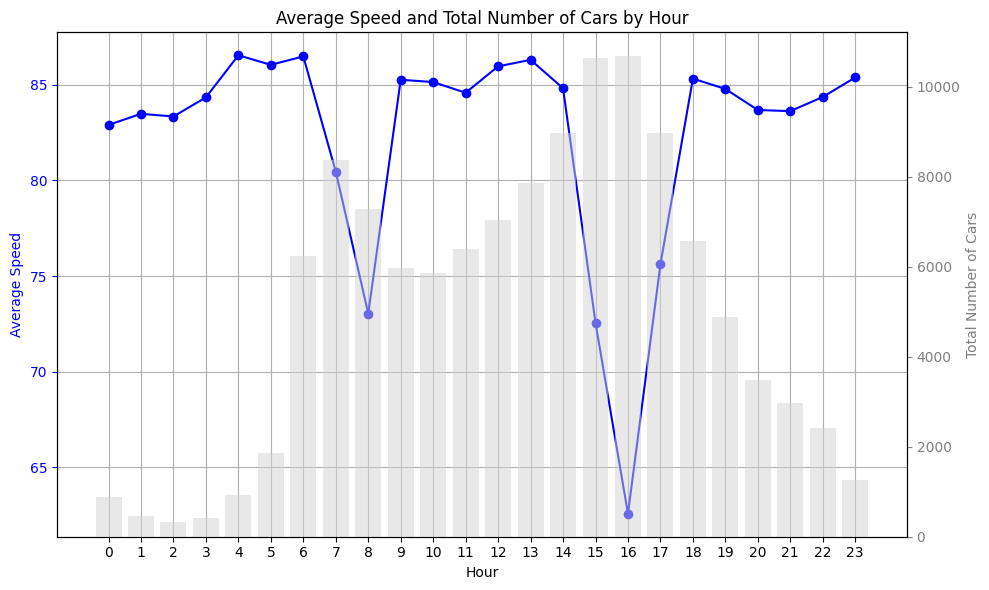

In [22]:
# tv_df['plot_hour'] = tv_df['hour'].dt.hour

tv_df['plot_hour'] = tv_df['hour'].dt.hour

tv_hourly_avg_speed = tv_df.groupby('plot_hour')['mean_speed'].mean().reset_index()
tv_hourly_total_cars = tv_df.groupby('plot_hour')['num_cars'].sum().reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Average Speed
ax1.plot(tv_hourly_avg_speed['plot_hour'], tv_hourly_avg_speed['mean_speed'], marker='o', linestyle='-', color='b', label='Average Speed')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Average Speed', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticks(tv_hourly_avg_speed['plot_hour'])

# Total Number of Cars
ax2 = ax1.twinx()
ax2.bar(tv_hourly_total_cars['plot_hour'], tv_hourly_total_cars['num_cars'], color='lightgray', alpha=0.5, label='Total Number of Cars')
ax2.set_ylabel('Total Number of Cars', color='gray')
ax2.tick_params('y', colors='gray')

# Title and grid
plt.title('Average Speed and Total Number of Cars by Hour')
ax1.grid(True)
fig.tight_layout()
plt.show()

c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


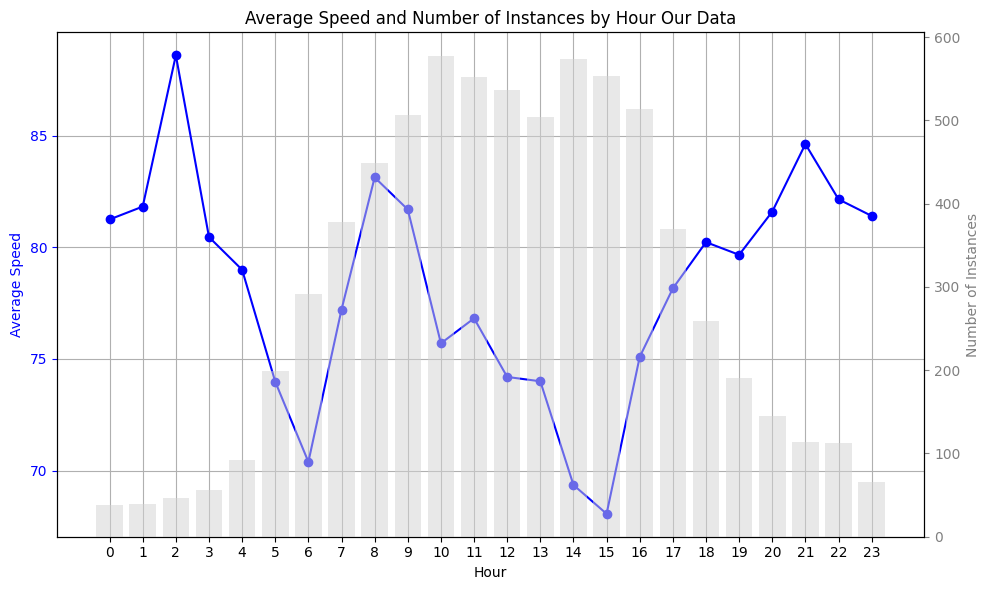

In [23]:

heading_df['hour'] = heading_df['first_timestamp'].dt.hour
hourly_avg_speed = heading_df.groupby('hour')['speed'].mean().reset_index()



hourly_counts = heading_df.groupby('hour').size().reset_index(name='count')


fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average speed on the left y-axis
ax1.plot(hourly_avg_speed['hour'], hourly_avg_speed['speed'], marker='o', linestyle='-', color='b', label='Average Speed')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Average Speed', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticks(hourly_avg_speed['hour'])

# Create a second y-axis to plot the number of instances
ax2 = ax1.twinx()
ax2.bar(hourly_counts['hour'], hourly_counts['count'], color='lightgray', alpha=0.5, label='Number of Instances')
ax2.set_ylabel('Number of Instances', color='gray')
ax2.tick_params('y', colors='gray')

# Set title, grid and show the plot
plt.title('Average Speed and Number of Instances by Hour Our Data')
ax1.grid(True)
fig.tight_layout()
plt.show()


In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate MSE and RMSE for lower_half compared to TV
mse = mean_squared_error(tv_hourly_avg_speed['mean_speed'], hourly_avg_speed['speed'])
rmse = np.sqrt(mse)

# Calculate MSE and RMSE for upper_half compared to TV
# mse_upper = mean_squared_error(tv_hourly_avg_speed['mean_speed'], upper_hourly_avg_speed['mean_velocity'])
# rmse_upper = np.sqrt(mse_upper)

print(f'MSE for compared to TV: {mse}')
print(f'RMSE for compared to TV: {rmse}')

MSE for compared to TV: 65.60624550613812
RMSE for compared to TV: 8.099768237803977


c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is tryin

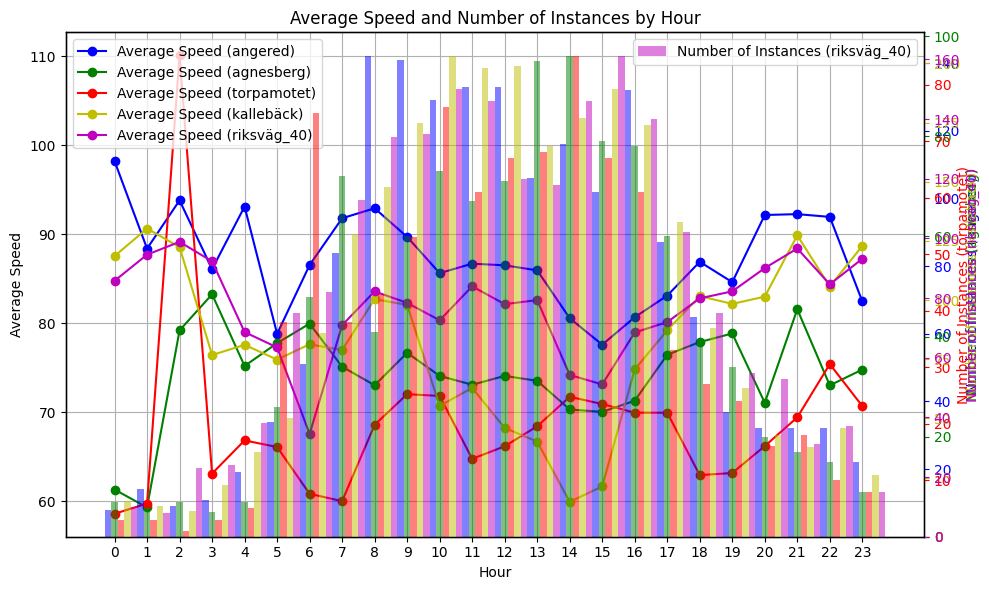

In [25]:
fig, ax1 = plt.subplots(figsize=(10, 6))

colors = ['b', 'g', 'r', "y", "m"]  # Different colors for each road
road_80_names = ["angered", "agnesberg", "torpamotet", "kallebäck", "riksväg_40"]  # Your road names

for idx, road_name in enumerate(road_80_names):
    # Filter rows for the current road
    road_df = heading_df[heading_df[road_name] == 1]
    
    # Compute hourly average speed and counts
    road_df['hour'] = road_df['first_timestamp'].dt.hour
    hourly_avg_speed = road_df.groupby('hour')['speed'].mean().reset_index()
    hourly_counts = road_df.groupby('hour').size().reset_index(name='count')

    # Plot average speed for the current road on the left y-axis
    ax1.plot(hourly_avg_speed['hour'], hourly_avg_speed['speed'], marker='o', linestyle='-', color=colors[idx], label=f'Average Speed ({road_name})')
    
    # Plot number of instances for the current road on the right y-axis
    ax2 = ax1.twinx()
    ax2.bar(hourly_counts['hour'] + 0.2*(idx-1), hourly_counts['count'], color=colors[idx], alpha=0.5, label=f'Number of Instances ({road_name})', width=0.2)
    ax2.set_ylabel(f'Number of Instances ({road_name})', color=colors[idx])
    ax2.tick_params('y', colors=colors[idx])

ax1.set_xlabel('Hour')
ax1.set_ylabel('Average Speed')
ax1.set_xticks(hourly_avg_speed['hour'])
ax1.grid(True)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Average Speed and Number of Instances by Hour')
fig.tight_layout()
plt.show()



c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\Timze\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is tryin

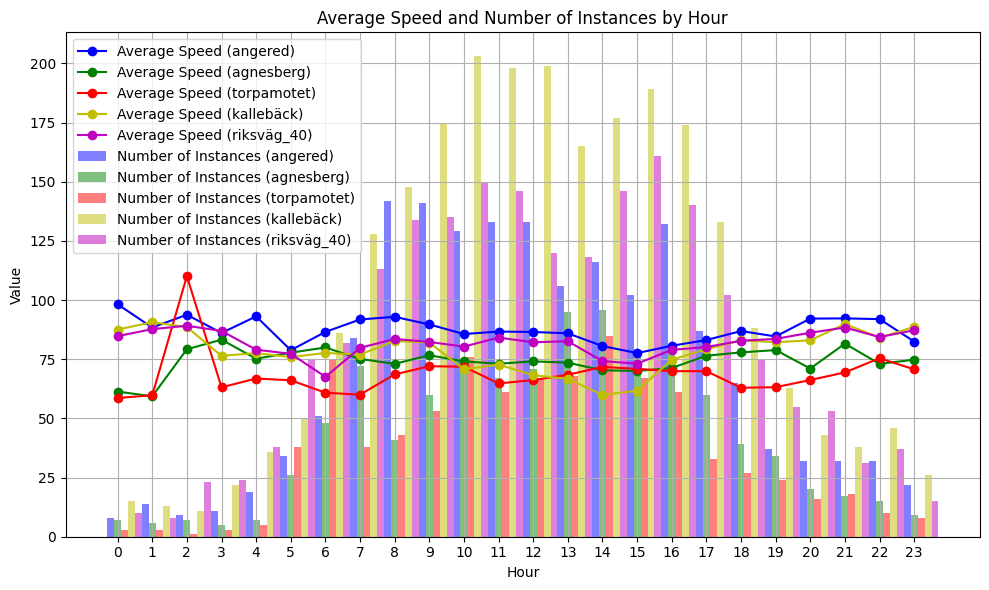

In [26]:
fig, ax1 = plt.subplots(figsize=(10, 6))

colors = ['b', 'g', 'r', "y", "m"]  # Different colors for each road
road_80_names = ["angered", "agnesberg", "torpamotet", "kallebäck", "riksväg_40"]

for idx, road_name in enumerate(road_80_names):
    # Filter rows for the current road
    road_df = heading_df[heading_df[road_name] == 1]
    
    # Compute hourly average speed and counts
    road_df['hour'] = road_df['first_timestamp'].dt.hour
    hourly_avg_speed = road_df.groupby('hour')['speed'].mean().reset_index()
    hourly_counts = road_df.groupby('hour').size().reset_index(name='count')

    # Plot average speed for the current road on ax1
    ax1.plot(hourly_avg_speed['hour'], hourly_avg_speed['speed'], marker='o', linestyle='-', color=colors[idx], label=f'Average Speed ({road_name})')
    
    # Plot number of instances for the current road on ax1 as bars
    ax1.bar(hourly_counts['hour'] + 0.2*(idx-1), hourly_counts['count'], color=colors[idx], alpha=0.5, label=f'Number of Instances ({road_name})', width=0.2)

ax1.set_xlabel('Hour')
ax1.set_ylabel('Value')
ax1.set_xticks(hourly_avg_speed['hour'])
ax1.grid(True)
ax1.legend(loc='upper left')
plt.title('Average Speed and Number of Instances by Hour')
fig.tight_layout()
plt.show()


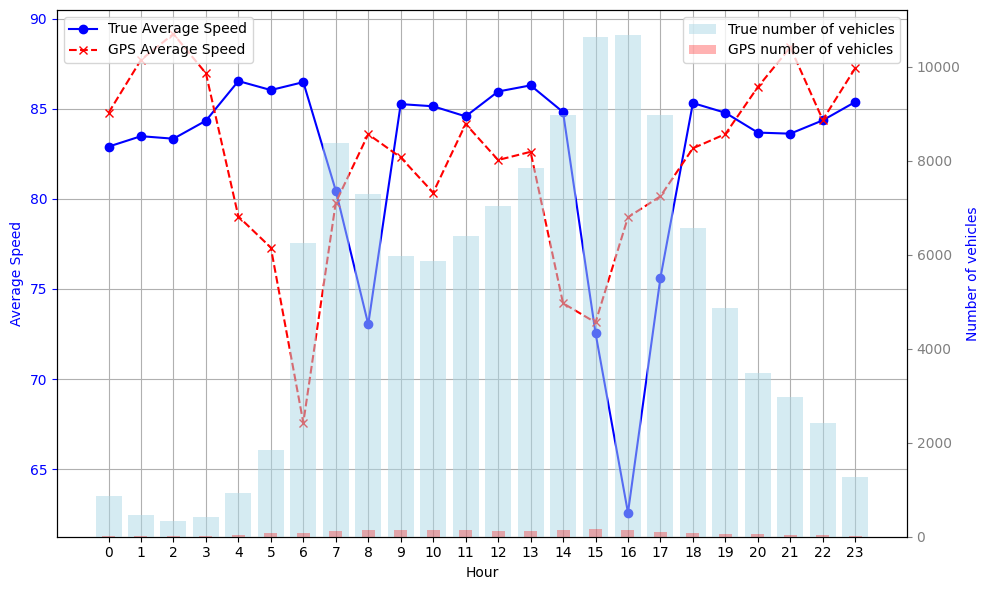

In [27]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# --- For tv_df data ---

# Average Speed for tv_df
ax1.plot(tv_hourly_avg_speed['plot_hour'], tv_hourly_avg_speed['mean_speed'], marker='o', linestyle='-', color='b', label='True Average Speed')
# Total Number of Cars
ax2 = ax1.twinx()
ax2.bar(tv_hourly_total_cars['plot_hour'], tv_hourly_total_cars['num_cars'], color='lightblue', alpha=0.5, label='True number of vehicles')

# --- For heading_df data ---

# Average Speed for heading_df
ax1.plot(hourly_avg_speed['hour'], hourly_avg_speed['speed'], marker='x', linestyle='--', color='r', label='GPS Average Speed')
# Number of Instances
ax2.bar(hourly_counts['hour'], hourly_counts['count'], color='red', alpha=0.3, label='GPS number of vehicles', width=0.4)

# Labels and other plot adjustments
ax1.set_xlabel('Hour')
ax1.set_ylabel('Average Speed', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(loc='upper left')
ax1.set_xticks(tv_hourly_avg_speed['plot_hour'])

ax2.set_ylabel('Number of vehicles', color='blue')
ax2.tick_params('y', colors='gray')
ax2.legend(loc='upper right')

# plt.title('Combined Plot of Average Speed, Number of Cars, and Number of Instances by Hour')
ax1.grid(True)
fig.tight_layout()
# plt.savefig("combined_congested.png")
plt.show()

MSE: 48.62
RMSE: 6.97


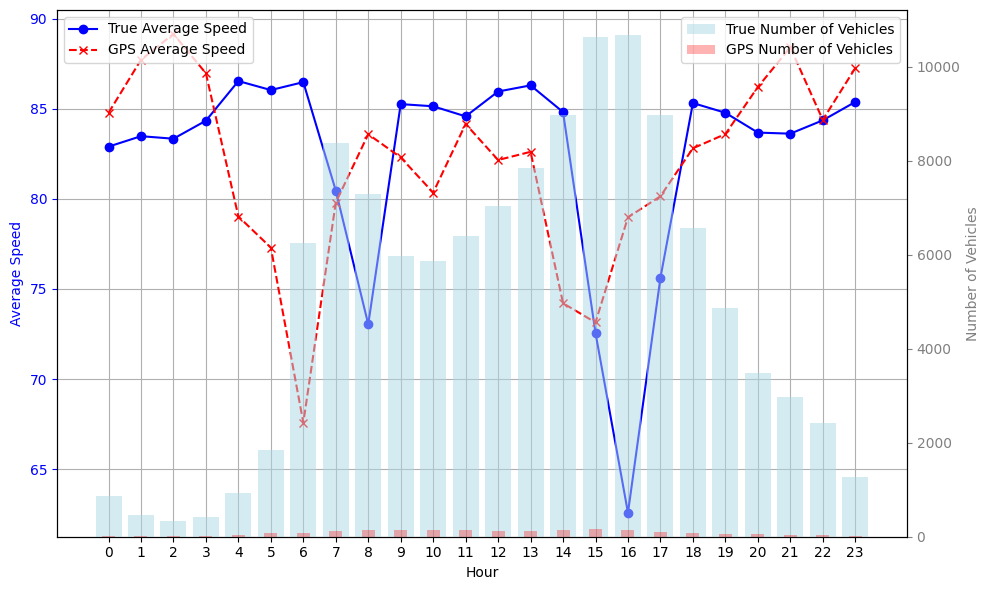

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and two axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# --- For tv_df data ---

# Average Speed for tv_df
ax1.plot(tv_hourly_avg_speed['plot_hour'], tv_hourly_avg_speed['mean_speed'], marker='o', linestyle='-', color='b', label='True Average Speed')
# Total Number of Cars for tv_df
ax2.bar(tv_hourly_total_cars['plot_hour'], tv_hourly_total_cars['num_cars'], color='lightblue', alpha=0.5, label='True Number of Vehicles')

# --- For heading_df data ---

# Average Speed for heading_df
ax1.plot(hourly_avg_speed['hour'], hourly_avg_speed['speed'], marker='x', linestyle='--', color='r', label='GPS Average Speed')
# Number of Instances for heading_df
ax2.bar(hourly_counts['hour'], hourly_counts['count'], color='red', alpha=0.3, label='GPS Number of Vehicles', width=0.4)

# Calculate MSE and RMSE
# combined_speed = (tv_hourly_avg_speed['mean_speed'] + hourly_avg_speed['speed']) / 2
combined_speed = hourly_avg_speed['speed']

actual_speed = tv_hourly_avg_speed['mean_speed']  # You can use the actual speed from tv_df here
mse = np.mean((combined_speed - actual_speed) ** 2)
rmse = np.sqrt(mse)
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

# Labels and other plot adjustments
ax1.set_xlabel('Hour')
ax1.set_ylabel('Average Speed', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(loc='upper left')
ax1.set_xticks(tv_hourly_avg_speed['plot_hour'])

ax2.set_ylabel('Number of Vehicles', color='gray')
ax2.tick_params('y', colors='gray')

ax2.legend(loc='upper right')

# plt.title('Combined Plot of Average Speed, Number of Cars, and Number of Instances by Hour')
ax1.grid(True)
fig.tight_layout()
# plt.savefig("combined_congested.png")
plt.show()


In [29]:
tv_df.num_cars.sum()

120783

In [30]:
for i in road_80_names:
    print(len(heading_df.loc[heading_df[i] == 1]))

1671
1032
883
2426
1991


In [31]:
geodf.shape

(18092, 17)